In [441]:
import torch
import importlib

import utils
import diffusion

importlib.reload(utils)
importlib.reload(diffusion)

from utils import load_transformed_CIFAR10_automobiles
from utils import visualize_images
from diffusion import Diffusion

# Load dataset

In [442]:
batch_size = 5
max_samples = 100

data, dataloader = load_transformed_CIFAR10_automobiles(batch_size=batch_size, max_samples=max_samples)

Files already downloaded and verified
Files already downloaded and verified


# Train model

In [443]:
T = 1000
scheduler = 'linear'

diffuser = Diffusion(T=T, noise_scheduler=scheduler)

epochs = 20
lr = 0.0001

diffuser.train(dataloader, epochs=epochs, lr=lr)

Epoch 0 | Avg loss: 0.9929935619235039 
New min loss. Model saved.
Epoch 1 | Avg loss: 0.911844789981842 
New min loss. Model saved.
Epoch 2 | Avg loss: 0.7250981763005256 
New min loss. Model saved.
Epoch 3 | Avg loss: 0.5425759844481945 
New min loss. Model saved.
Epoch 4 | Avg loss: 0.4210153743624687 
New min loss. Model saved.
Epoch 5 | Avg loss: 0.35277538038790224 
New min loss. Model saved.
Epoch 6 | Avg loss: 0.2696248676627874 
New min loss. Model saved.
Epoch 7 | Avg loss: 0.2221208292990923 
New min loss. Model saved.
Epoch 8 | Avg loss: 0.19599650613963604 
New min loss. Model saved.
Epoch 9 | Avg loss: 0.18514971006661654 
New min loss. Model saved.
Epoch 10 | Avg loss: 0.19287141021341087 
Epoch 11 | Avg loss: 0.17978114895522596 
New min loss. Model saved.
Epoch 12 | Avg loss: 0.19583660159260036 
Epoch 13 | Avg loss: 0.18627220038324593 
Epoch 14 | Avg loss: 0.18064593579620122 
Epoch 15 | Avg loss: 0.1718876600265503 
New min loss. Model saved.
Epoch 16 | Avg loss: 0.

# Visualize forward process

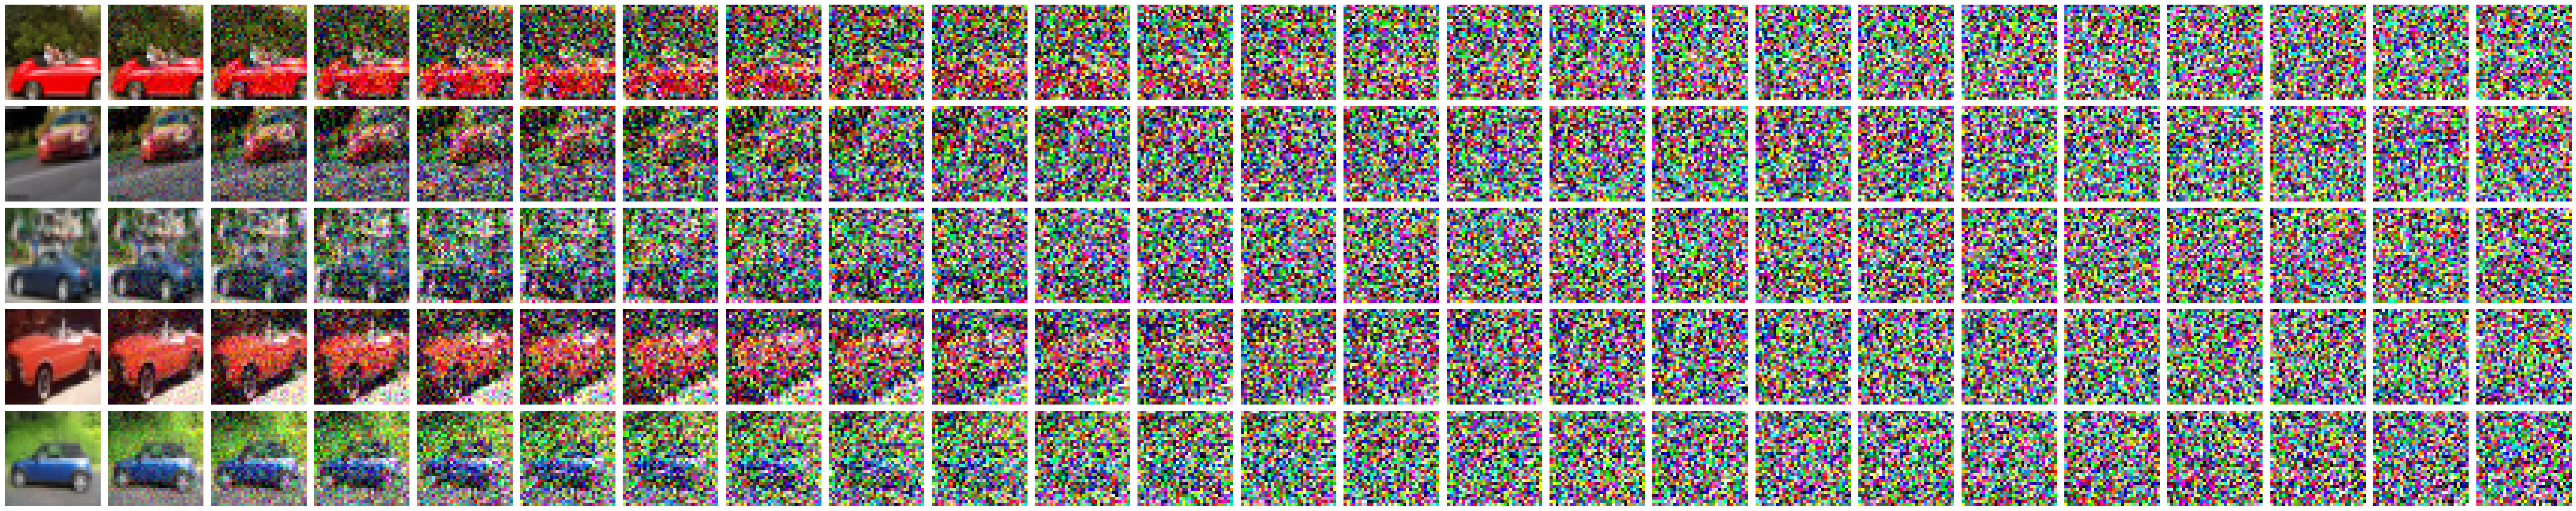

In [444]:
n_rows = batch_size
n_cols = 25
T = 1000

it = iter(dataloader)
imgs, labels = next(it)

forward_process_list = diffuser.get_forward_process_list(x_0=imgs)
visualize_images(forward_process_list, n_rows, n_cols)

# Visualize backward process

In [458]:
T = 1000
image_shape = (3, 32, 32)

backward_process_list = diffuser.infer(T=T, batch_size=batch_size, image_shape=image_shape)


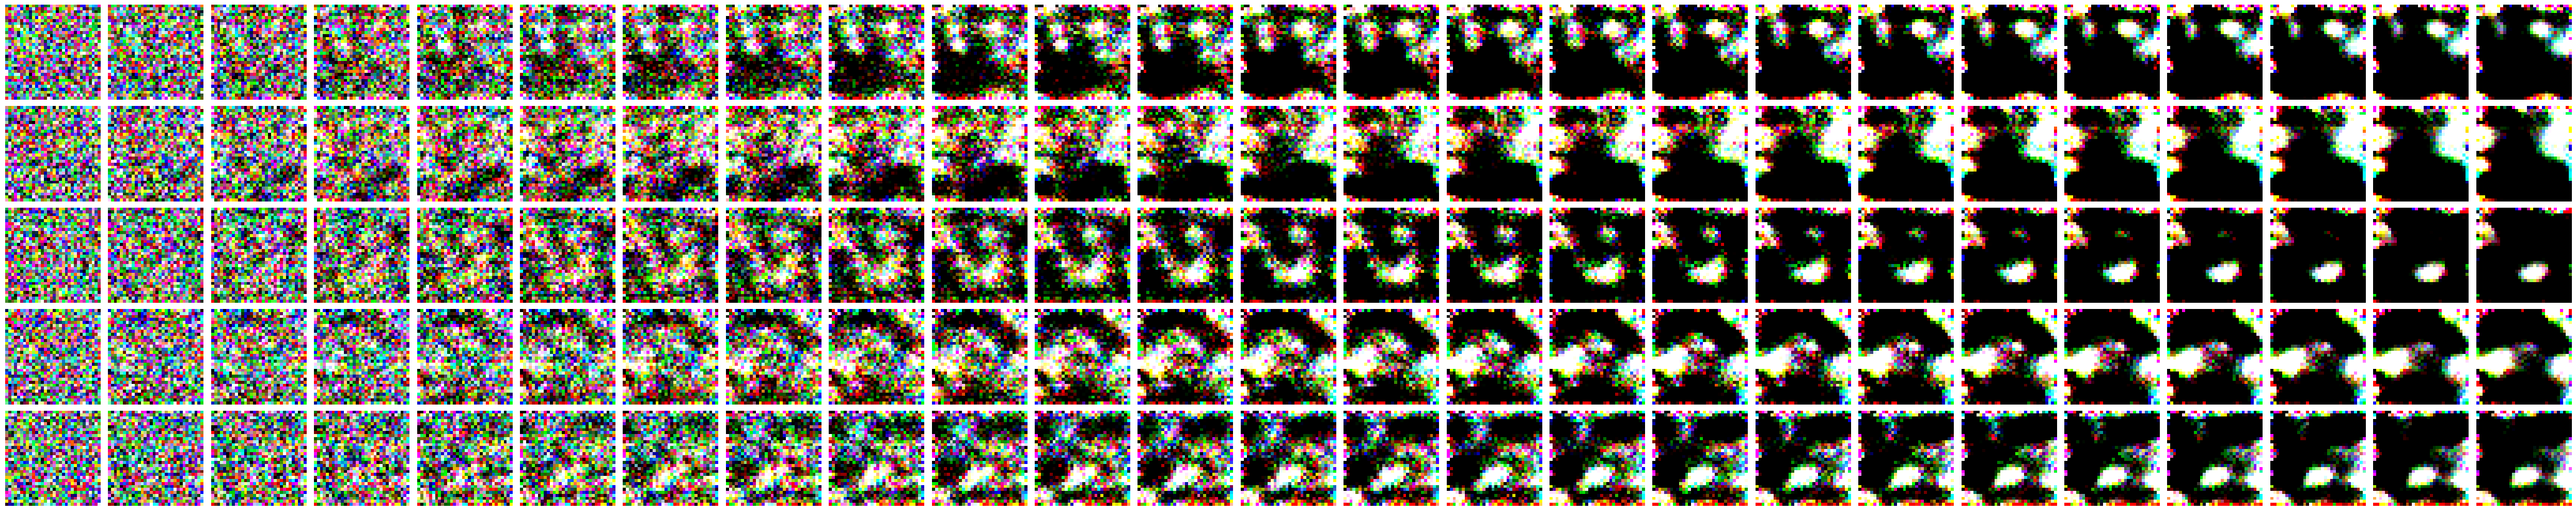

In [459]:
n_rows = batch_size
n_cols = 25
visualize_images(backward_process_list, n_rows, n_cols)
